<a href="https://colab.research.google.com/github/VeryBigkind/Dynamic-Decoupling/blob/main/Project%20Dynamic%20Decoupling/Dynamic%20Decoupling%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [ ]:
!pip install qutip
!pip install numpy
!pip install matplotlib

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


#0. Time-Independent Dispersive Qubit-Resonator Hamiltonian (Rotating Frame, Dispersive Limit)

1) Hamiltonian

$H =\chi\sigma_z a^\dagger a$

In [ ]:
# constant
N = 10
chi = 1
alpha_0 = 1

gamma = 1

T_end = 10

In [ ]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
a = destroy(N)

H0 = chi*tensor(sz, a.dag()*a)

2) Ramsey Sequence : $\pi/2$ pulse -> free evolution -> $\pi/2$ pulse

In [ ]:
def Hp_coeff(t, args):
    A = args['A']
    sig = args['sigma']
    T = args['T']
    T_end = args['T_end']
    return A / np.sqrt(2 * np.pi * sig **2) * np.exp(-(t - T) ** 2 / (2 * sig **2)) + A / np.sqrt(2 * np.pi * sig **2) * np.exp(-(t - T_end + T) ** 2 / (2 * sig **2))

In [ ]:
def Hp_coeff(t, T, T_end):

    return (np.pi/(2*T))*(t>0)*(t<T) + (np.pi/(2*T))*(t<T_end)*(t>T_end-T)

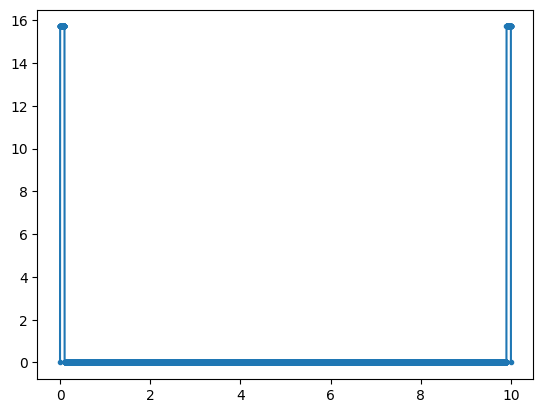

In [ ]:
# pulse shape example
T = 0.1
T_end = 10
t = np.linspace(0, T_end, 10000)
plt.figure()
plt.plot(t, Hp_coeff(t, T, T_end), '.-')

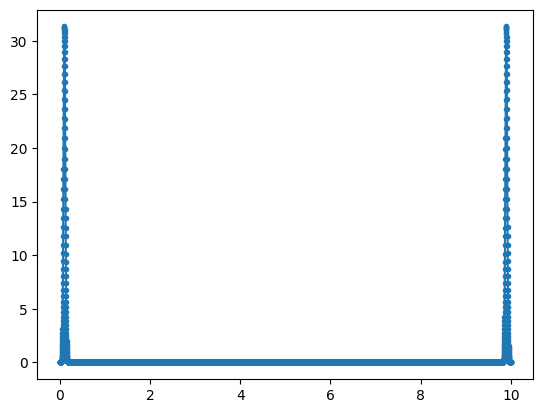

In [ ]:
# pulse shape example
T = 0.1
args = {
    'A': np.pi/2,   # pulse amplitude factor
    'T': T,         # duration of pulse (good to choose > 4 * sigma)
    'sigma': T / 5,  # sigma of Gaussian
    'T_end': T_end
}

t = np.linspace(0, T_end, 10000)
plt.figure()
plt.plot(t, Hp_coeff(t, args), '.-')

In [ ]:
psi = tensor(basis(2,0), coherent(N, alpha_0))
tlist = np.linspace(0,T_end,10000)
Hp = tensor(0.5*sx, qeye(N))

H=[H0,[Hp,Hp_coeff]]

3) Plot (Include $\pi/2$ pulse)

In [ ]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())

op_list = [sx_composite, sy_composite, sz_composite, sm_composite, annihilate_composite, create_composite]

res = sesolve(H, psi, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

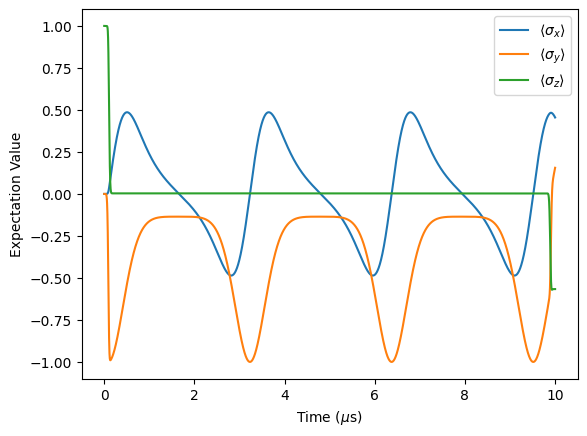

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

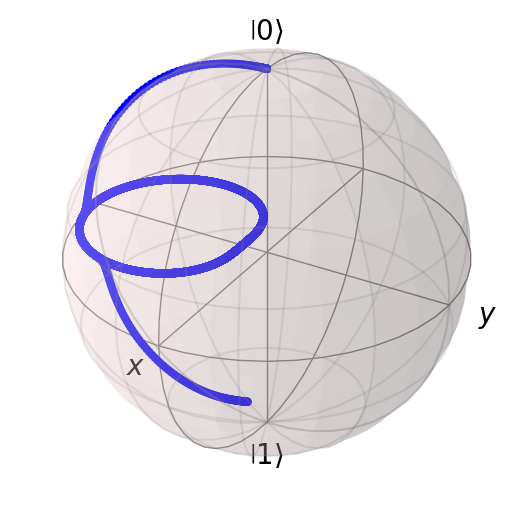

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

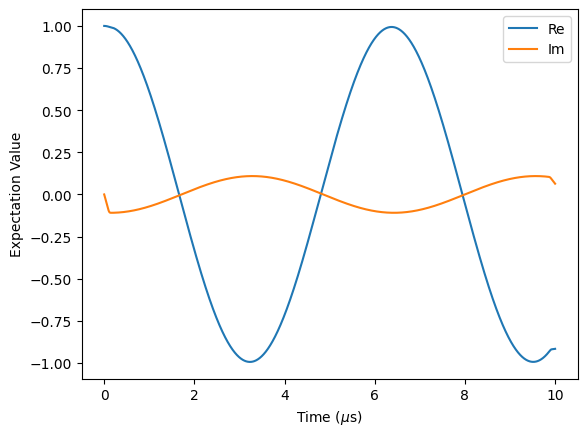

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[4].real, label = 'Re')
ax.plot(tlist, res.expect[4].imag, label = 'Im')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Im[$\\alpha$]')

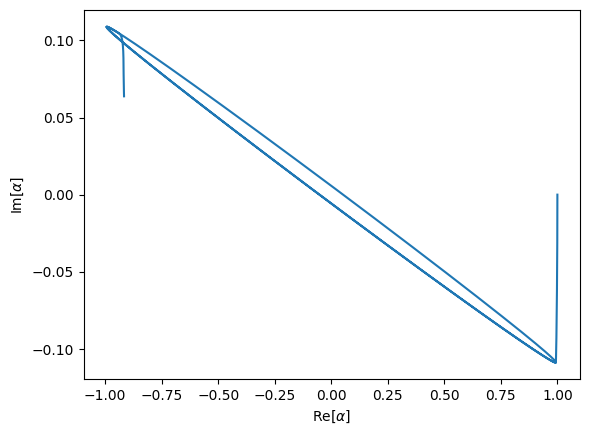

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(res.expect[4].real, res.expect[4].imag)
ax.set_xlabel(r'Re[$\alpha$]')
ax.set_ylabel(r'Im[$\alpha$]')

4) Plot (Not Include $\pi/2$ pulse)

Text(0, 0.5, 'Expectation Value')

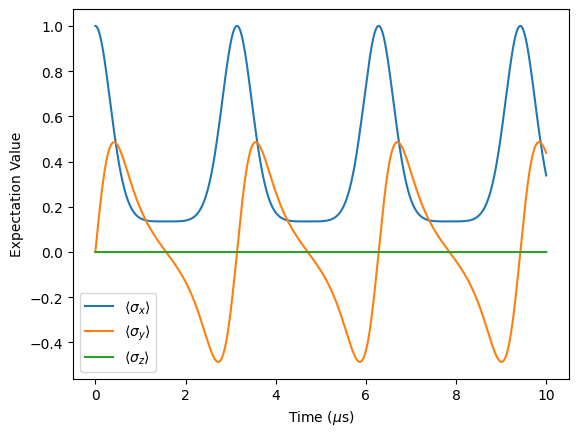

In [ ]:
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))
res = sesolve(H0, psi_plus, tlist, op_list, args = args)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

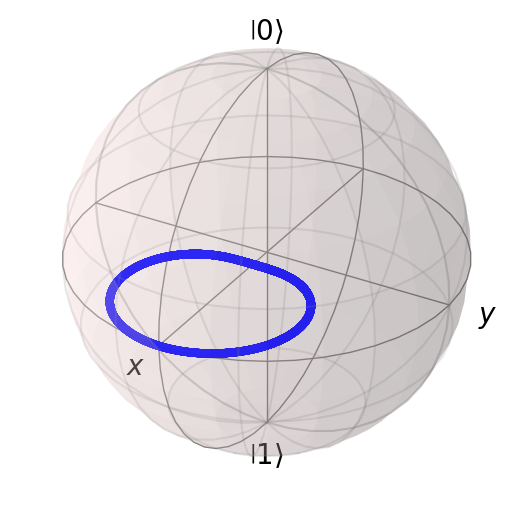

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

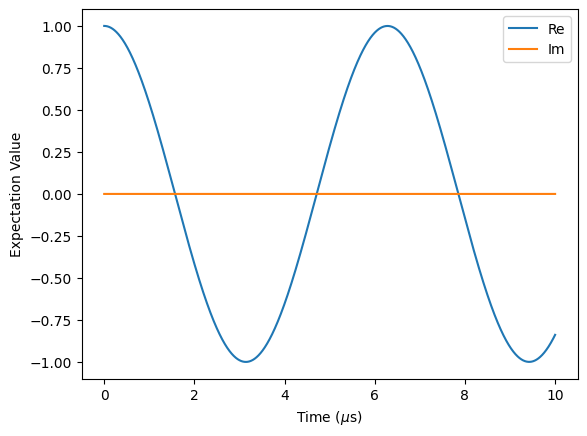

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[4].real, label = 'Re')
ax.plot(tlist, res.expect[4].imag, label = 'Im')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

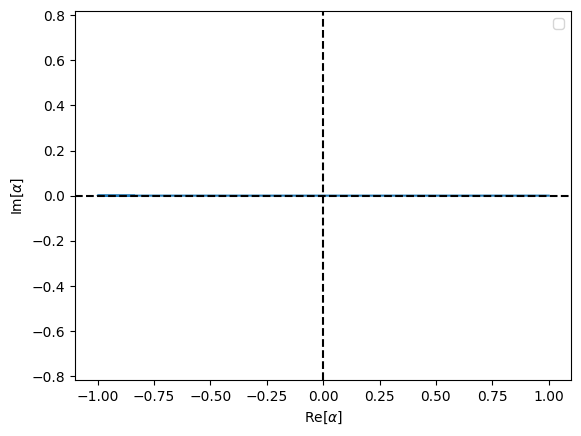

In [ ]:
plt.figure()
plt.plot(res.expect[4].real, res.expect[4].imag)
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

5) Plot (Not Include $\pi/2$ pulse, Initial State : 0 State, 1 State)

In [ ]:
tlist = np.linspace(0,2,10000)

psi_0 = tensor(basis(2,0), coherent(N, alpha_0))
psi_1 = tensor(basis(2,1), coherent(N, alpha_0))

res_0 = sesolve(H0, psi_0, tlist, op_list, args = args)
res_1 = sesolve(H0, psi_1, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

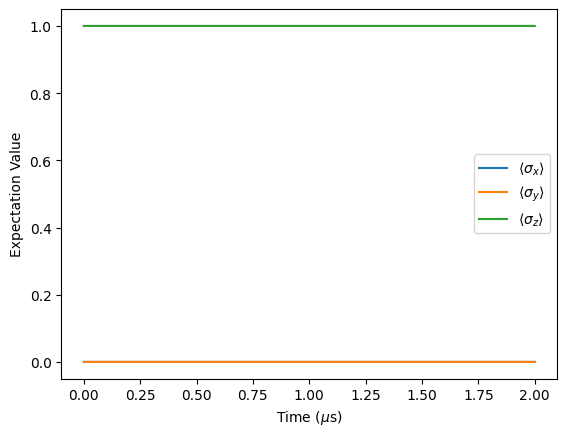

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_0.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_0.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

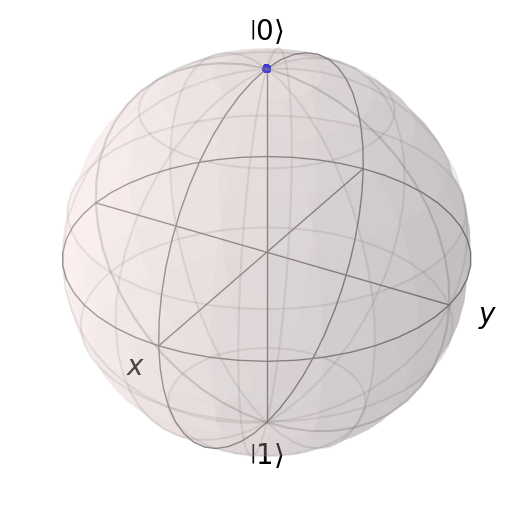

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_0.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

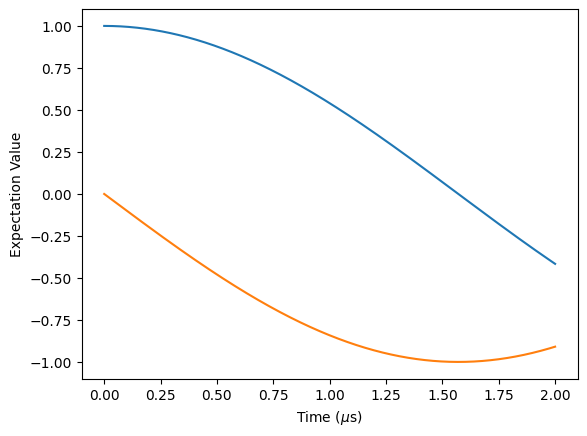

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0.expect[4].real, label = 'Re')
ax.plot(tlist, res_0.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

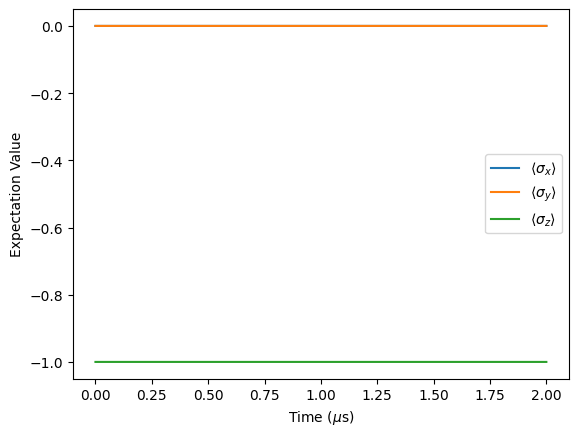

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_1.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_1.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_1.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

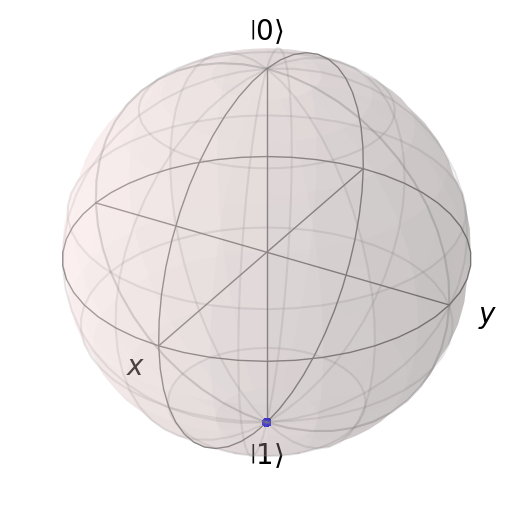

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_1.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

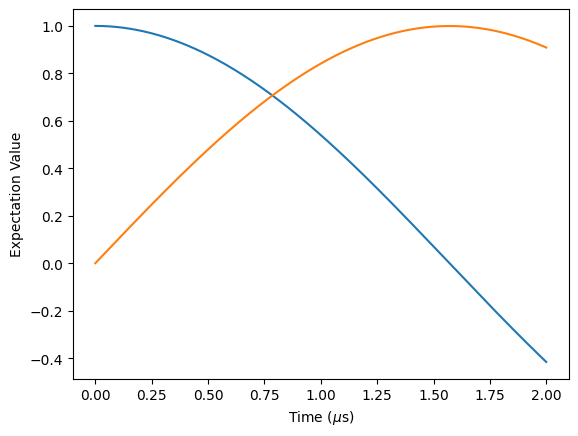

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_1.expect[4].real, label = 'Re')
ax.plot(tlist, res_1.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

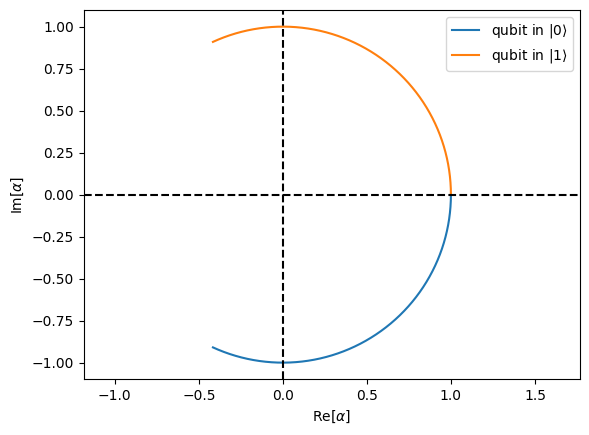

In [ ]:
plt.figure()
plt.plot(res_0.expect[4].real, res_0.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_1.expect[4].real, res_1.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

#1. Time-Independent Qubit-Resonator Hamiltonian (Quantum Rabi Model)

1) Hamiltonian

$H = \frac{\omega_q}{2}\sigma_z + \omega_r a^\dagger a + g\sigma_x(a+a^\dagger)$

In [ ]:
# constant
N = 100
alpha_0 = 1

omega_q = 2
omega_r = 1
g = 0.1

T_end = 10

In [ ]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
a = destroy(N)

H0 = 0.5*omega_q*tensor(sz, qeye(N)) + omega_r*tensor(qeye(2), a.dag()*a) + g*tensor(sx, a + a.dag())

In [ ]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())

tlist = np.linspace(0,T_end,10000)
op_list = [sx_composite, sy_composite, sz_composite, sm_composite, annihilate_composite, create_composite]

psi_00 = tensor(basis(2,0), basis(N,0))
psi_p0 = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0))
psi_10 = tensor(basis(2,1), basis(N,0))
psi_0c = tensor(basis(2,0), coherent(N, alpha_0))
psi_pc = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), coherent(N, alpha_0))
psi_1c = tensor(basis(2,1), coherent(N, alpha_0))

res_00 = sesolve(H0, psi_00, tlist, op_list, args = args)
res_p0 = sesolve(H0, psi_p0, tlist, op_list, args = args)
res_10 = sesolve(H0, psi_10, tlist, op_list, args = args)
res_0c = sesolve(H0, psi_0c, tlist, op_list, args = args)
res_pc = sesolve(H0, psi_pc, tlist, op_list, args = args)
res_1c = sesolve(H0, psi_1c, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

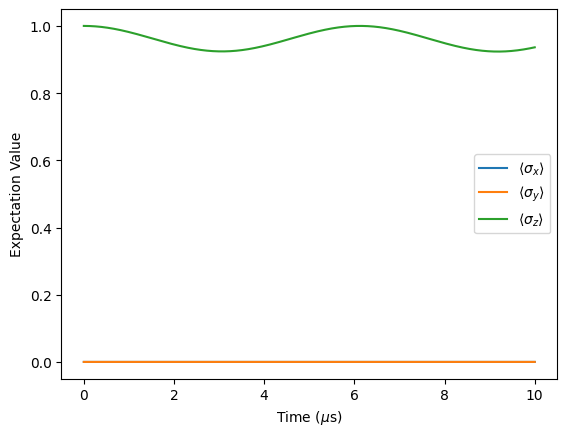

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_00.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_00.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_00.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

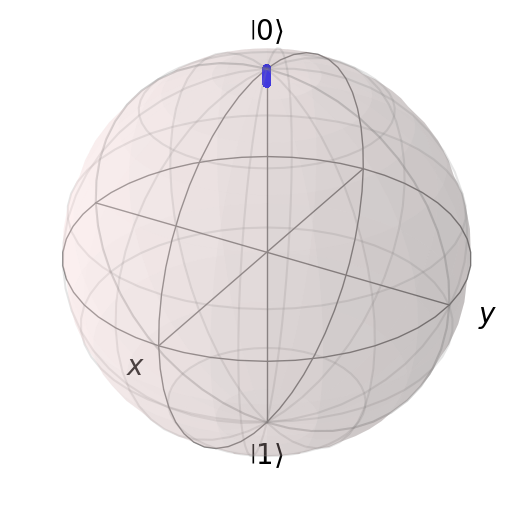

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_00.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

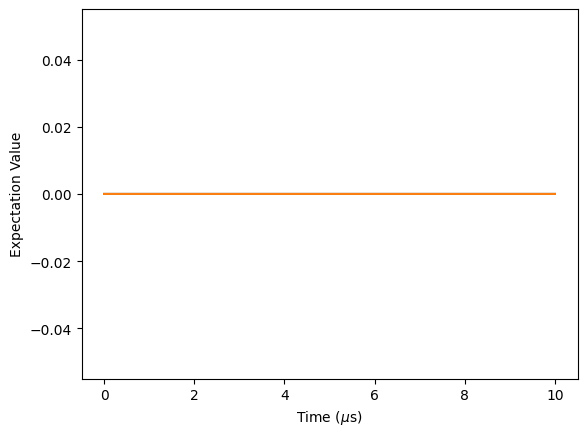

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_00.expect[4].real, label = 'Re')
ax.plot(tlist, res_00.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

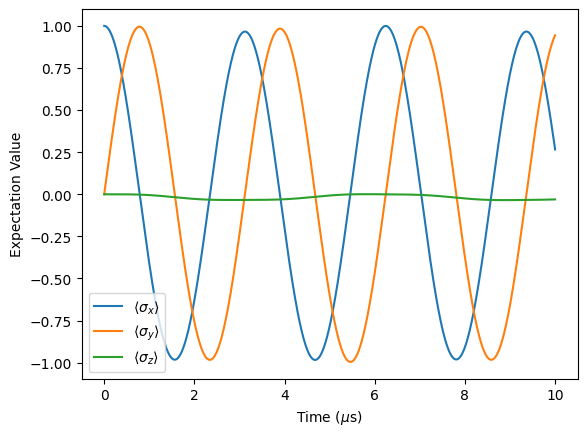

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_p0.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_p0.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_p0.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

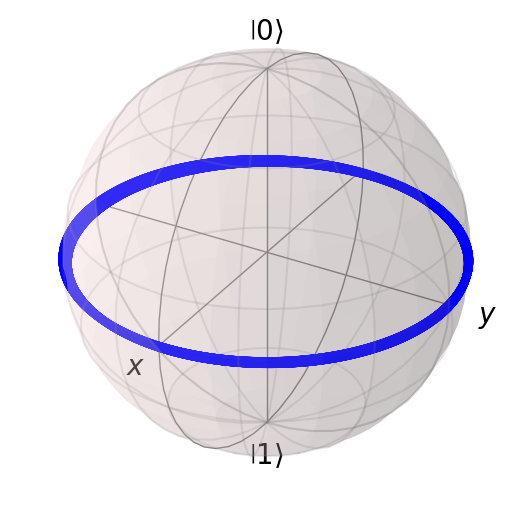

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_p0.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

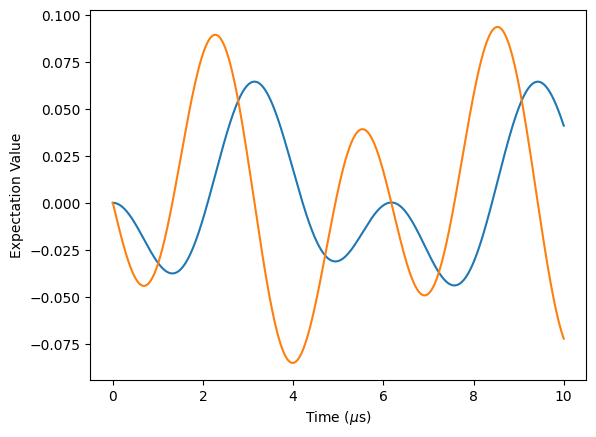

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_p0.expect[4].real, label = 'Re')
ax.plot(tlist, res_p0.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

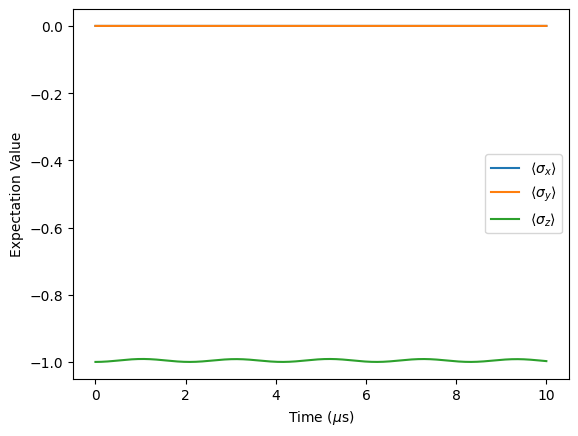

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_10.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_10.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_10.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

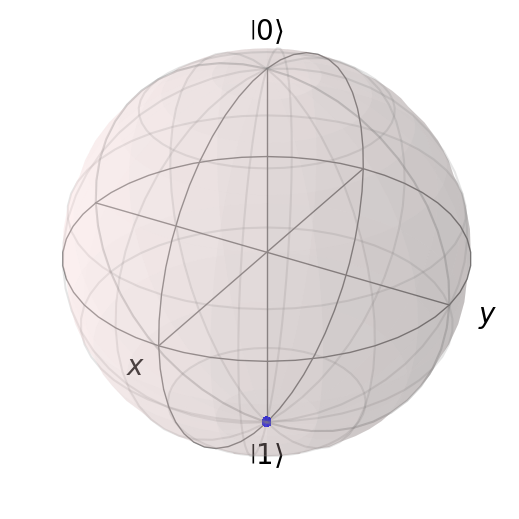

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_10.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

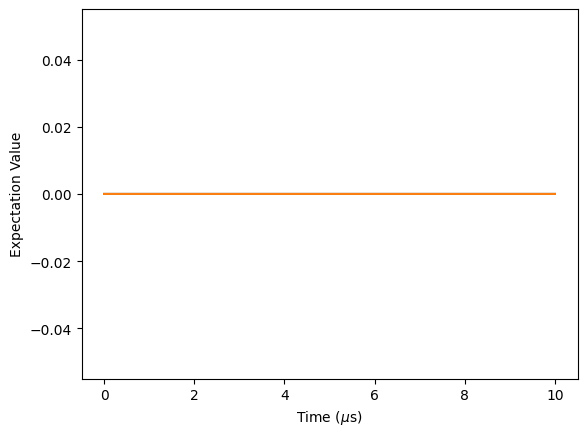

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_10.expect[4].real, label = 'Re')
ax.plot(tlist, res_10.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

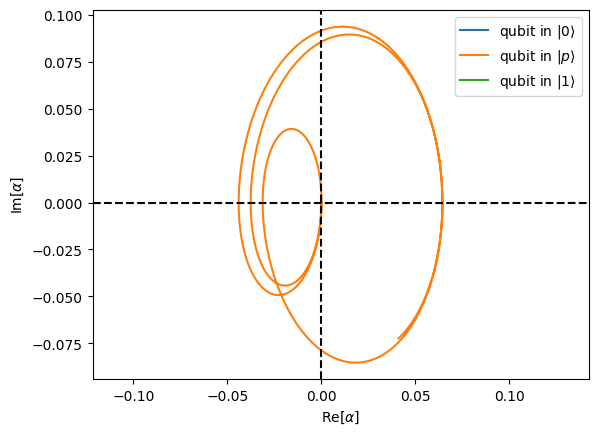

In [ ]:
plt.figure()
plt.plot(res_00.expect[4].real, res_00.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_p0.expect[4].real, res_p0.expect[4].imag, label=r'qubit in $|p\rangle$')
plt.plot(res_10.expect[4].real, res_10.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

Text(0, 0.5, 'Expectation Value')

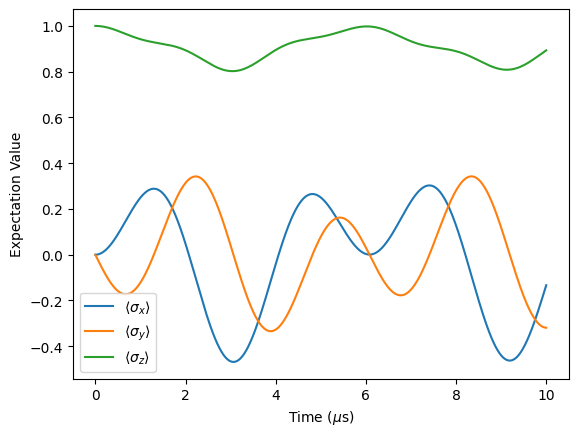

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0c.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_0c.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_0c.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

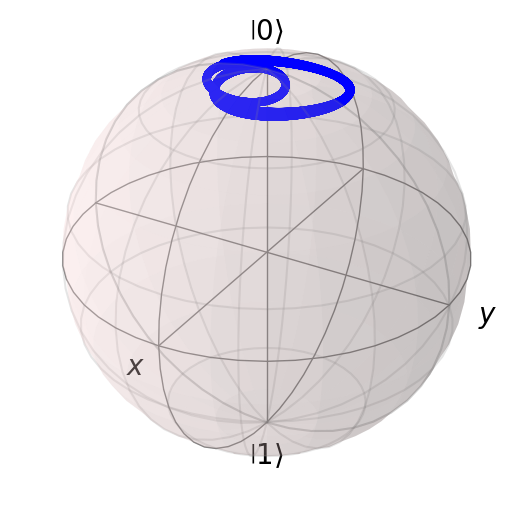

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_0c.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

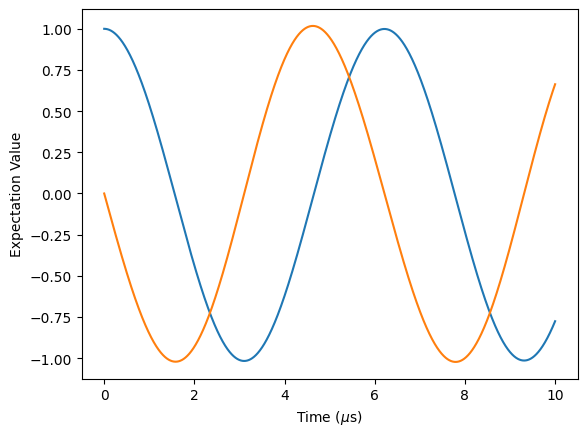

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0c.expect[4].real, label = 'Re')
ax.plot(tlist, res_0c.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

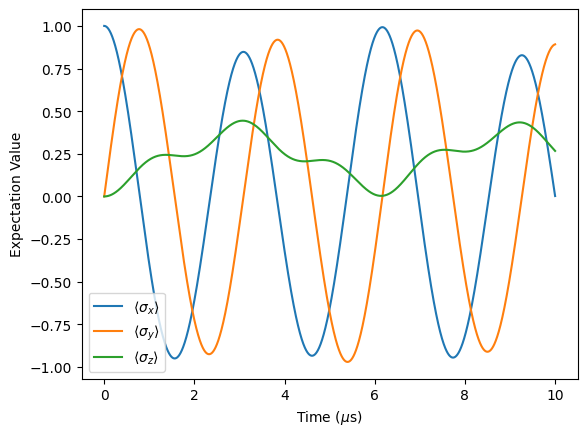

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_pc.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_pc.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_pc.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

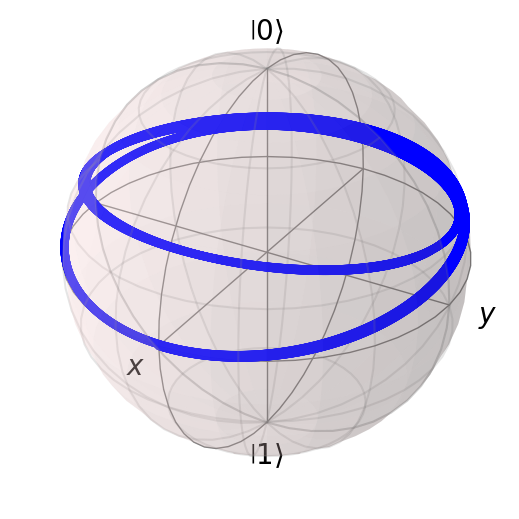

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_pc.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

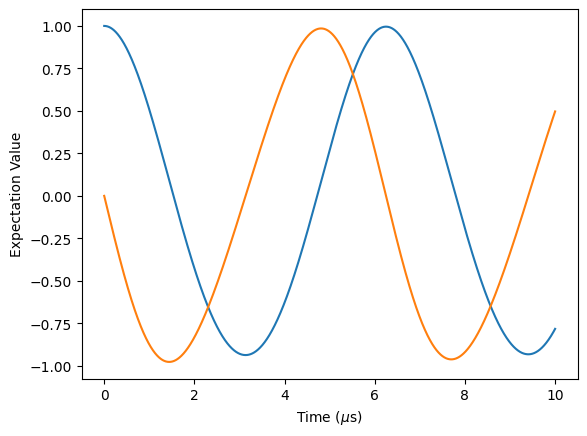

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_pc.expect[4].real, label = 'Re')
ax.plot(tlist, res_pc.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

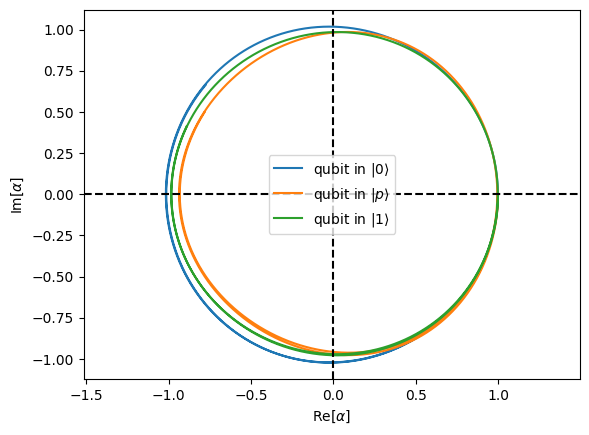

In [ ]:
plt.figure()
plt.plot(res_0c.expect[4].real, res_0c.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_pc.expect[4].real, res_pc.expect[4].imag, label=r'qubit in $|p\rangle$')
plt.plot(res_1c.expect[4].real, res_1c.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

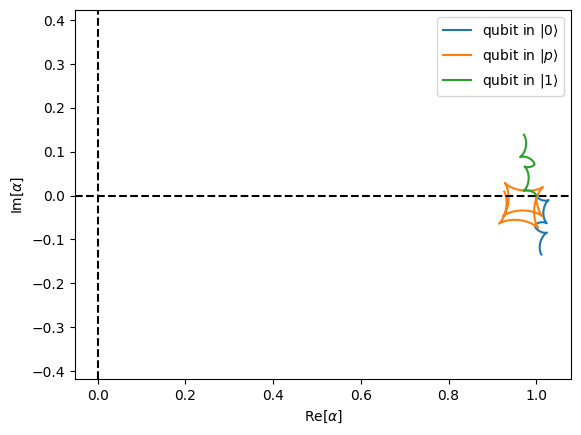

In [ ]:
res_rot_0c = res_0c.expect[4]*np.exp(1j*omega_r*tlist)
res_rot_pc = res_pc.expect[4]*np.exp(1j*omega_r*tlist)
res_rot_1c = res_1c.expect[4]*np.exp(1j*omega_r*tlist)

plt.figure()
plt.plot(res_rot_0c.real, res_rot_0c.imag, label=r'qubit in $|0\rangle$')
plt.plot(res_rot_pc.real, res_rot_pc.imag, label=r'qubit in $|p\rangle$')
plt.plot(res_rot_1c.real, res_rot_1c.imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

#2. blahblah